In [1]:
import numpy as np
import pylab as plt
import swyft
swyft.set_verbosity(0)
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

In [2]:
DEVICE = 'cuda'

## Torus model

In [3]:
def model(params, center = np.array([0.6, 0.8])):
    a, b, c = params['a'], params['b'], params['c']
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([a, r, c])
    return dict(x=x)

def noise(obs, params, noise = np.array([0.03, 0.005, 0.2])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

In [4]:
par0 = dict(a=0.57, b=0.8, c=1.0)
obs0 = model(par0)  # Using Asimov data

In [5]:
prior = swyft.Prior({"a": ["uniform", 0., 1.], "b": ["uniform",  0., 1.], "c": ["uniform", 0., 1.]})

In [6]:
s = swyft.NestedRatios(model, prior, noise = noise, obs = obs0, device = DEVICE)
s.run(Ninit = 3000, train_args = dict(lr_schedule = [1e-3, 1e-4]), max_rounds = 10, density_factor = 2, Nmax = 15000)

Simulate:   2%|▏         | 64/3018 [00:00<00:04, 639.46it/s]

NRE ROUND 0


Simulate: 100%|██████████| 3018/3018 [00:04<00:00, 632.27it/s]


NRE ROUND 1


Simulate: 100%|██████████| 2778/2778 [00:04<00:00, 652.68it/s]


NRE ROUND 2


Simulate: 100%|██████████| 3286/3286 [00:04<00:00, 695.25it/s]


NRE ROUND 3


Simulate: 100%|██████████| 5108/5108 [00:07<00:00, 726.96it/s]


NRE ROUND 4
--> Posterior volume is converged. <--


In [7]:
post = s.gen_2d_marginals(N = 15000)

Simulate: 100%|██████████| 8400/8400 [00:11<00:00, 734.69it/s]


In [8]:
post_samples = post(obs0, n_samples = 10000000)

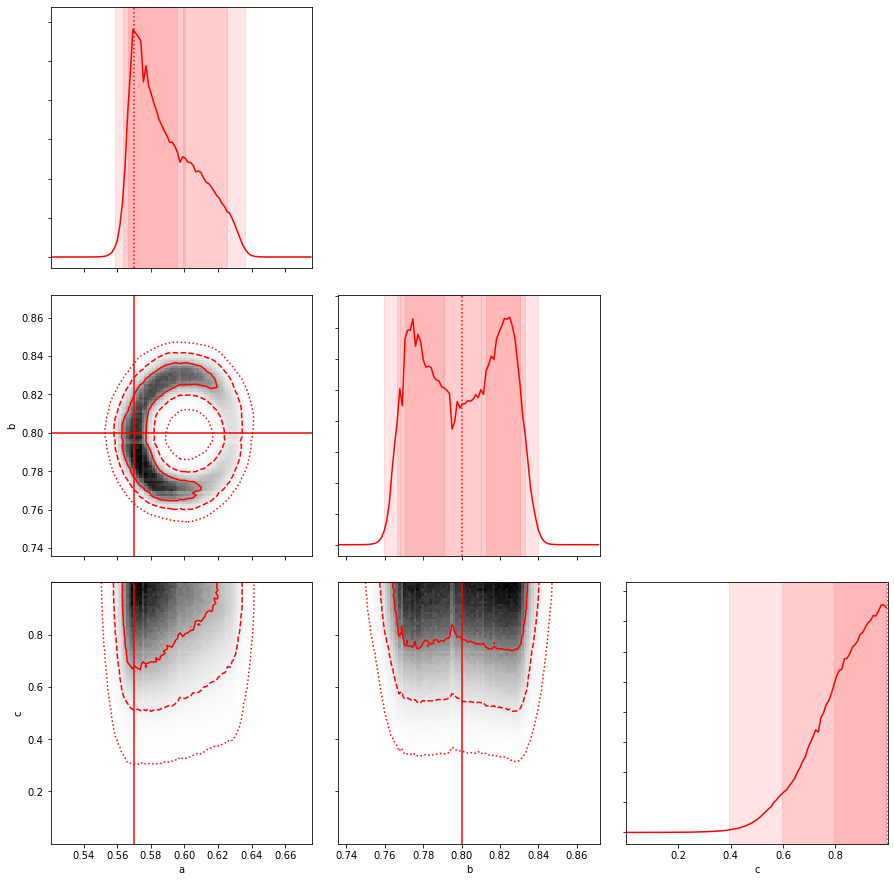

In [9]:
swyft.corner(post_samples, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)